# Avocado Data Analysis

## Business Understanding

The aim of this project is to answer the following four questions:

    1. Which region are the lowest and highest prices of Avocado?

    2. What is the highest region of avocado production?

    3. What is the average avocado prices in each year?
    
    4. What is the average avocado volume in each year?

## Data Understanding

The [Avocado dataset](https://www.kaggle.com/neuromusic/avocado-prices) was been used in this project.

This dataset contains 13 columns:
- 1. Date - The date of the observation
- 2. AveragePrice: the average price of a single avocado
- 3. Total Volume: Total number of avocados sold
- 4. Total Bags: Total number  of bags
- 5. Small Bags: Total number of Small bags
- 6. Large Bags: Total number of Large bags
- 7. ExtraLarge Bags: Total number of XLarge bags
- 8. type: conventional or organic
- 9. year: the year
- 10. region: the city or region of the observation
- 11. 4046: Total number of avocados with PLU 4046 sold
- 12. 4225: Total number of avocados with PLU 4225 sold
- 13. 4770: Total number of avocados with PLU 4770 sold

## Import the required libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Data preparation
## Data load

In [4]:
df = pd.read_csv(r"D:\Dropbox\DS & AI\Full stack DS and AI course\27 Jun\Price prediction\avocado.csv")

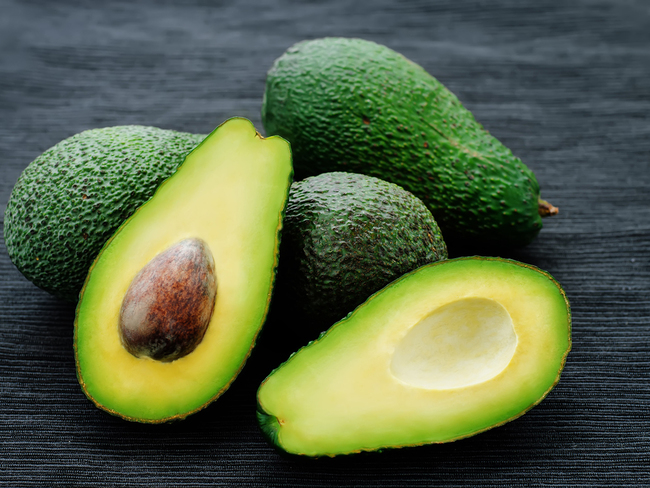

In [28]:
#display image using python
from IPython.display import Image
Image(filename=r"D:\Dropbox\DS & AI\Full stack DS and AI course\27 Jun\RESUME PROJECT -- PRICE PREDICTION\Fruti.jpg")

### Explore the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [8]:
df.tail(8)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [9]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


### Missing values in the dataset

In [11]:
df.isnull().sum()
# No missing values in the dataset

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Dropping unnecessary columns

In [12]:
# Looking at the dataset, we can see that the 'Unnamed: 0' column is just an index and does not provide any useful information for our analysis. 
# We can drop this column.
# The 'Date' column is also not needed for our analysis, as we are not going to use it for prediction.
# We can drop this column as well.
# Columns like '4046', '4225', and '4770' are not needed for our analysis, as we are only interested in the average price of avocados.
df.drop(columns=['Unnamed: 0', 'Date', '4046', '4225', '4770'], inplace=True)

In [13]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


## Answering the questions

In [15]:
# Question 1: What is the average price of avocados in the dataset?
average_price = df['AveragePrice'].mean()
print(average_price)

1.405978409775878


In [17]:
# Or, another way to calculate the average price
average_price = df['AveragePrice'].sum() / df['AveragePrice'].count()
print(average_price)

1.405978409775878


In [ ]:
def get_average(df,column):
    """
    Description: This function to return the average value of the column 

    Arguments:
        df: the DataFrame. 
        column: the selected column. 
    Returns:
        column's average 
    """
    return sum(df[column])/len(df)

In [23]:
print(get_average(df,'AveragePrice'))

1.405978409775878


In [36]:
def plot(data,xlabel,ylabel):
    """
    Description: This function to draw a barplot

    Arguments:
        data: the DataFrame. 
        xlabel: the label of the first column. 
        ylabel: the label of the second column.
    Returns:
        None
    """
        
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Average '+ylabel+' of Avocado According to '+xlabel));
    plt.show();


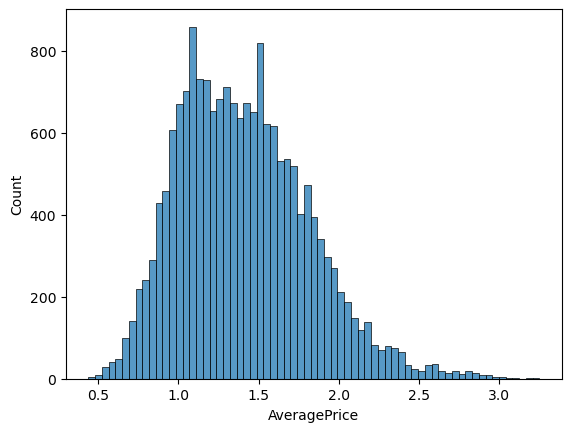

In [34]:
sns.histplot(df['AveragePrice']);

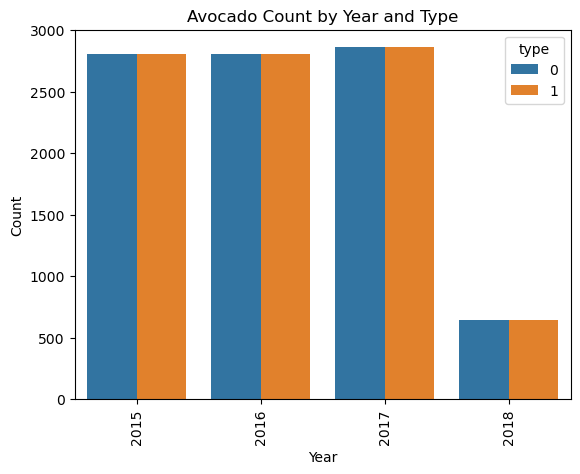

In [80]:
sns.countplot(x='year', data=df, hue='type')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Avocado Count by Year and Type')
plt.show()

In [81]:
df.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_23432\1292012871.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='type',x='AveragePrice',data=df, orient='h', palette='rocket');


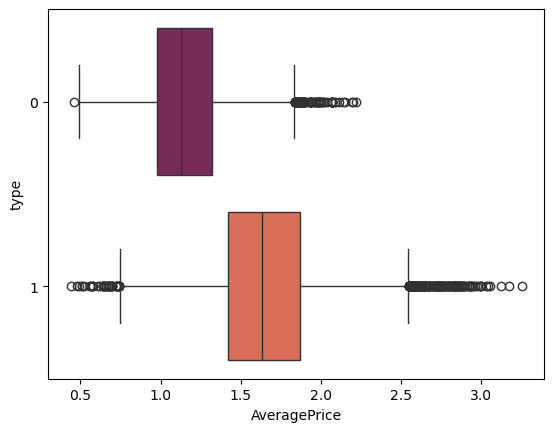

In [83]:
sns.boxplot(y='type',x='AveragePrice',data=df, orient='h', palette='rocket');

<Axes: xlabel='AveragePrice', ylabel='Total Volume'>

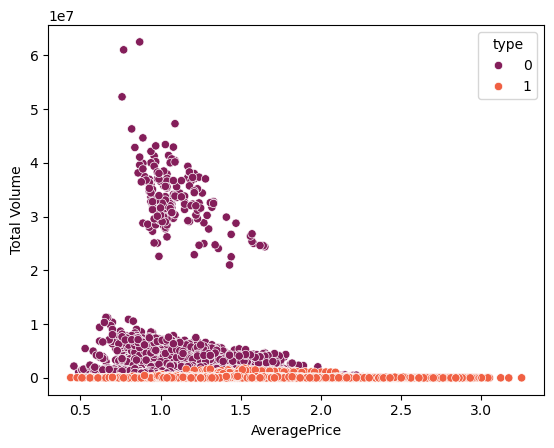

In [84]:
# Organic avocados are more expensive.
sns.scatterplot(x='AveragePrice', y='Total Volume', data=df, hue='type', palette='rocket')

C:\Users\Dell\AppData\Local\Temp\ipykernel_23432\6295205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='year',y='AveragePrice',data=df,palette='rocket');


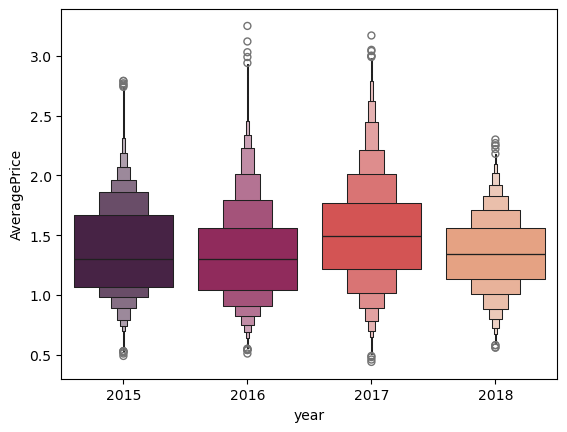

In [93]:
df.year=df.year.apply(str)
sns.boxenplot(x='year',y='AveragePrice',data=df,palette='rocket');
plt.show()

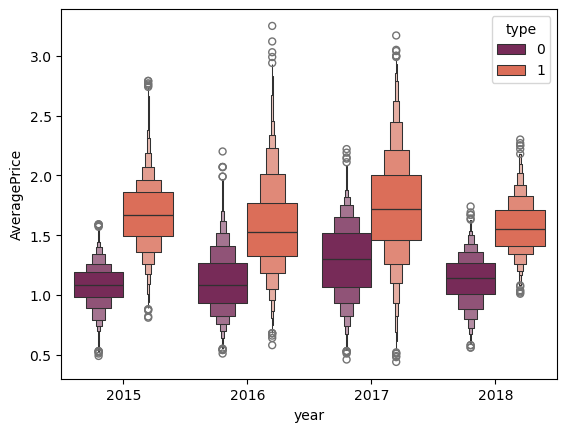

In [91]:
df.year=df.year.apply(str)
sns.boxenplot(x='year',y='AveragePrice',data=df,palette='rocket',order=df.year.unique(), hue='type');
plt.show()

### Which region are the lowest and highest prices of Avocado?

In [37]:
def get_average_between_two_columns(df,column1,column2):
    """
    Description: This function calculate the average between two columns in the dataset

    Arguments:
        df: the DataFrame. 
        column1:the first column. 
        column2:the second column.
    Returns:
        Sorted data for relation between column1 and column2
    """
    
    List=list(df[column1].unique())
    average=[]

    for i in List:
        x=df[df[column1]==i]
        column1_average= get_average(x,column2)
        average.append(column1_average)

    df_column1_column2=pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index=df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data

C:\Users\Dell\AppData\Local\Temp\ipykernel_23432\1058530487.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')


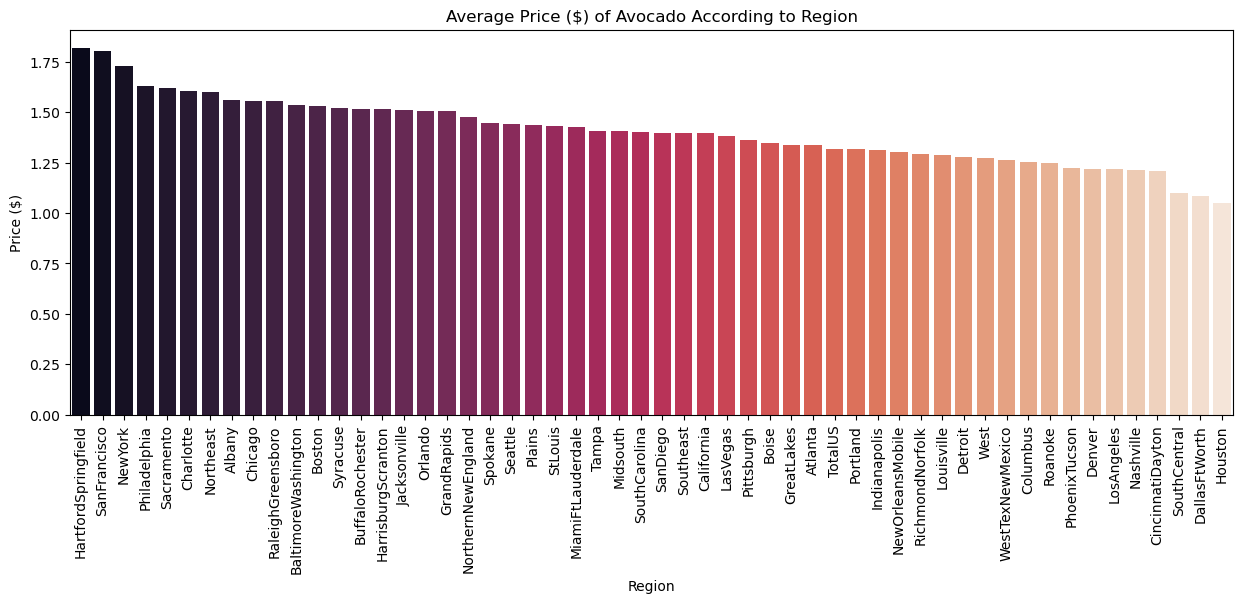

In [38]:
data1 = get_average_between_two_columns(df,'region','AveragePrice')
plot(data1,'Region','Price ($)')

In [47]:
print(data1['column1'].iloc[-1], " is the region producing avocado with the lowest price.")

Houston  is the region producing avocado with the lowest price.


### What is the highest region of avocado production?

#### Checking if there are outlier values or not.

Text(0.5, 1.0, 'Figure 1: Boxplot representing outlier columns.')

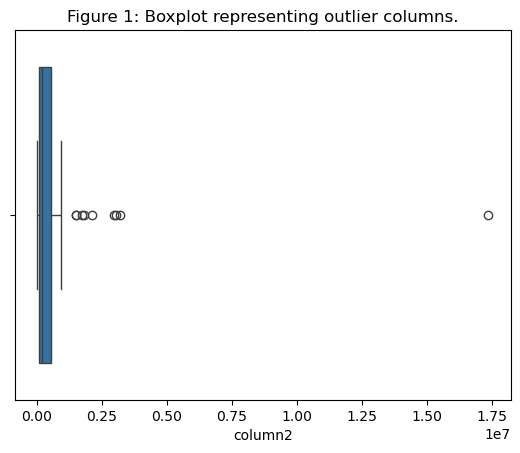

In [50]:
data2 = get_average_between_two_columns(df,'region','Total Volume')
sns.boxplot(x=data2.column2).set_title("Figure 1: Boxplot representing outlier columns.")

In [51]:
outlier_region = data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1], "is outlier value")

TotalUS is outlier value


#### Remove the outlier values

In [94]:
outlier_region.index
data2 = data2.drop(outlier_region.index,axis=0)



KeyError: '[51] not found in axis'

C:\Users\Dell\AppData\Local\Temp\ipykernel_23432\1058530487.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')


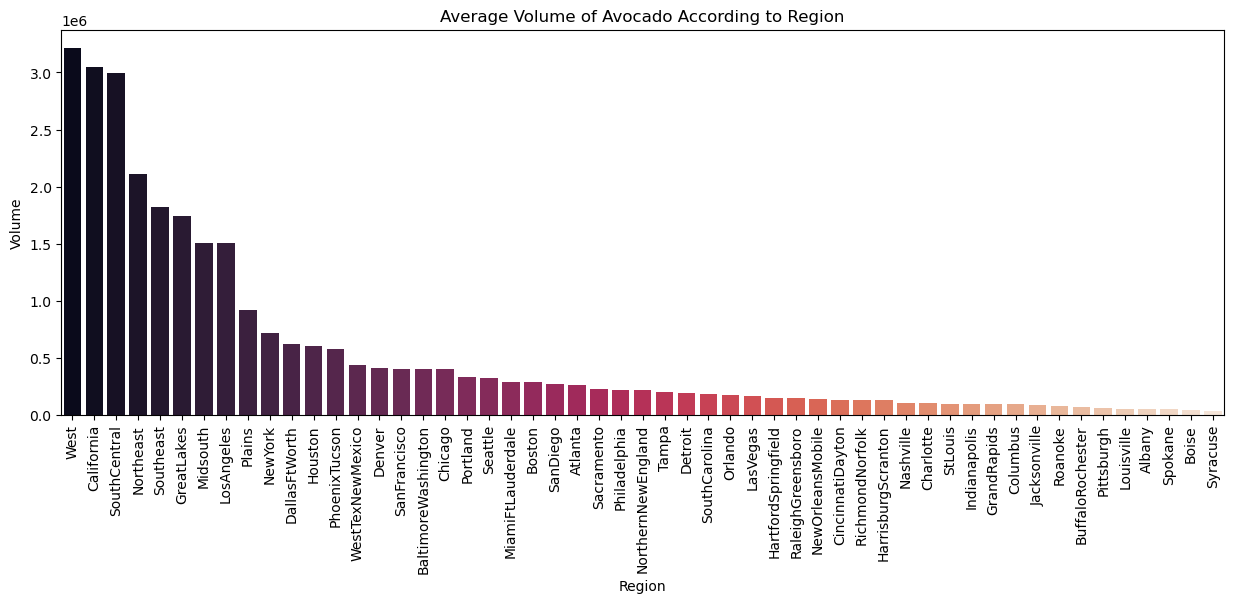

In [53]:
plot(data2,'Region','Volume')

### What is the average avocado prices in each year?

C:\Users\Dell\AppData\Local\Temp\ipykernel_23432\1058530487.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')


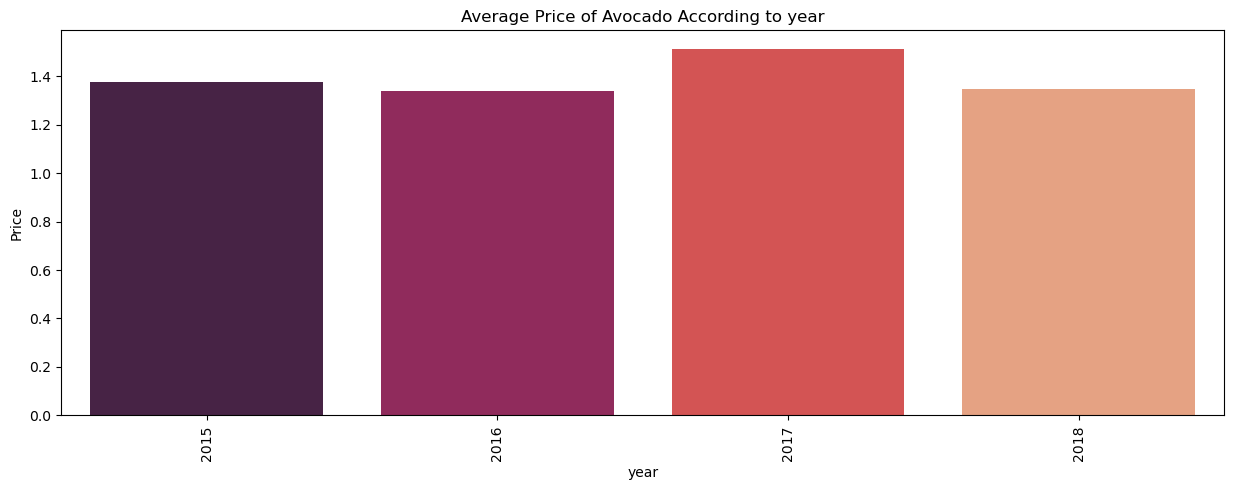

In [54]:
data3 = get_average_between_two_columns(df,'year','AveragePrice')
plot(data3,'year','Price')

### What is the average avocado volume in each year?

C:\Users\Dell\AppData\Local\Temp\ipykernel_23432\1058530487.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')


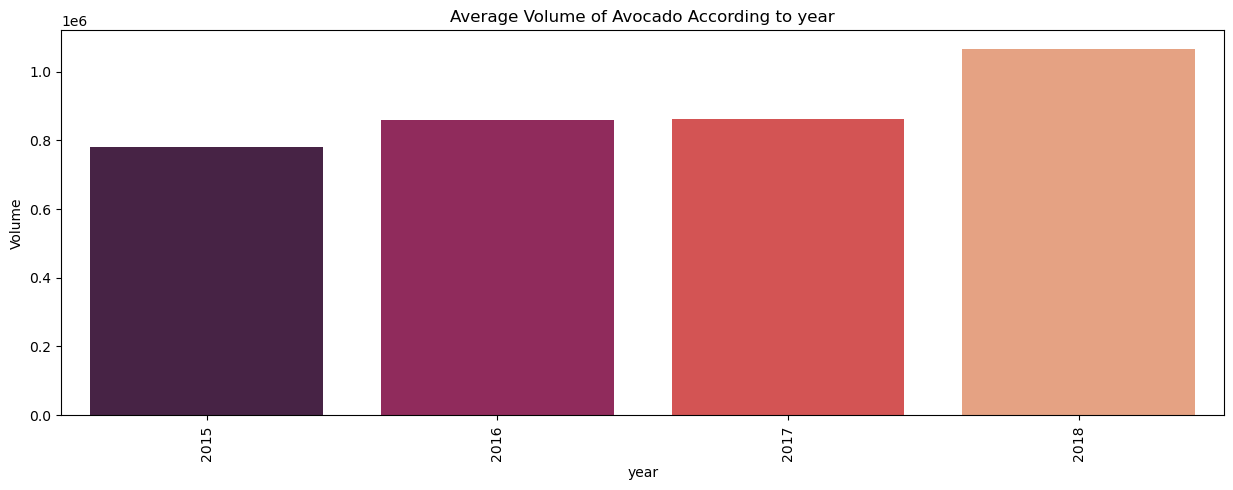

In [55]:
data4 = get_average_between_two_columns(df,'year','Total Volume')
plot(data4,'year','Volume')

## Data Modeling
- We build a the regression model used by [Linear regression from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to predict the avocado price.

### Changing some column types to categories

In [56]:
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

df['type'] = df['type'].astype('category')
df['type'] = df['type'].cat.codes

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [58]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


### Splitting the dataset into the Training set and Test set

In [60]:
# Split data into X and y
X = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

# Split data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=15)

In [61]:
print("training set:",X_train.shape,' - ',y_train.shape[0],' samples')
print("testing set:",X_test.shape,' - ',y_test.shape[0],' samples')

training set: (12774, 8)  -  12774  samples
testing set: (5475, 8)  -  5475  samples


In [69]:
# Build and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the Results

In [70]:
# Prediction and calculate the accuracy for the testing dataset
test_pre = model.predict(X_test)
test_score = r2_score(y_test,test_pre)
print("The accuracy of testing dataset ",test_score*100)

The accuracy of testing dataset  38.58074176452888


In [71]:
# Prediction and calculate the accuracy for the training dataset
train_pre = model.predict(X_train)
train_score = r2_score(y_train,train_pre)
print("The accuracy of training dataset ",train_score*100)

The accuracy of training dataset  39.70686042410628


In [74]:
# The model doesn't work well with this dataset, In order to the avocado prices were near together;
# so we need to add some noise to the data

### Let us compare the performance of different models

In [104]:
#Creating dummy variables (removed 'Month' since it does not exist)
dummies=pd.get_dummies(df[['year','region']],drop_first=True)
df_dummies=pd.concat([df[['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags','type']],dummies],axis=1)
target=df['AveragePrice']

#Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies, target, test_size=0.3, random_state=0)

#Standardizing the data
cols_to_std=['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std]=scaler.transform(X_train[cols_to_std])
X_test[cols_to_std]=scaler.transform(X_test[cols_to_std])

In [105]:
#importing the required libraries for regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [107]:
# Fill NaN values in 'type' column with 0 for both train and test sets
X_train_filled = X_train.copy()
X_test_filled = X_test.copy()
if 'type' in X_train_filled.columns:
    X_train_filled['type'] = X_train_filled['type'].fillna(0)
    X_test_filled['type'] = X_test_filled['type'].fillna(0)

#To save time #Creating a function to evaluate the models
regressors={
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regression': SVR(gamma=1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=1),
    'XGBoost': XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R-2 Score'])
for method,func in regressors.items():
    model=func.fit(X_train_filled,y_train)
    pred=func.predict(X_test_filled)
    results.loc[method]=[np.round(mean_absolute_error(y_test,pred),3),
                         np.round(mean_squared_error(y_test,pred),3),
                         np.round(r2_score(y_test,pred),3)
                         ]

In [111]:
results

,MAE,MSE,R-2 Score
Linear Regression,0.311,0.150,0.074
Random Forest,0.122,0.031,0.809
Decision Tree,0.159,0.059,0.637
Support Vector Regression,0.160,0.051,0.686
K-Nearest Neighbors,0.126,0.035,0.781
XGBoost,0.125,0.031,0.810


In [109]:
f"10% of mean of target variable is {np.round(0.1 * df.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [118]:
results.sort_values(by='R-2 Score', ascending=False).style.background_gradient(cmap='grey',subset=['R-2 Score'])

,MAE,MSE,R-2 Score
XGBoost,0.125000,0.031000,0.810000
Random Forest,0.122000,0.031000,0.809000
K-Nearest Neighbors,0.126000,0.035000,0.781000
Support Vector Regression,0.160000,0.051000,0.686000
Decision Tree,0.159000,0.059000,0.637000
Linear Regression,0.311000,0.150000,0.074000
